<a href="https://colab.research.google.com/github/SunYutongAmber/SignatureWork/blob/main/random_forest_and_auto-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SunYutongAmber/main/data/tx_db.csv')
df_cryp.head()

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...


# Rarity Calculation

## Trait Rarity 

In [3]:
df_cryp['attributes']

0        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
1        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
2            ['Welding Goggles', 'Dark Hair', 'Cigarette']
3            ['Welding Goggles', 'Dark Hair', 'Cigarette']
4        ['Black Lipstick', 'Green Eye Shadow', 'Mohawk...
                               ...                        
17821                   ['Blonde Short', 'Classic Shades']
17822                  ['Frown', 'Do-rag', 'Small Shades']
17823        ['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']
17824            ['Messy Hair', 'Earring', 'Normal Beard']
17825    ['Pipe', 'Straight Hair Blonde', 'Purple Lipst...
Name: attributes, Length: 17826, dtype: object

In [4]:
list_of_all_attributes=df_cryp['attributes'].map(ast.literal_eval).sum()
#list_of_attributes

In [5]:
#get the polishe list for all the attributes
list_of_attributes_remove_the_repeats=list(set(df_cryp['attributes'].map(ast.literal_eval).sum()))
list_of_attributes_remove_the_repeats = [x for x in list_of_attributes_remove_the_repeats if x != '']
list_of_attributes_remove_the_repeats

['Front Beard',
 'Purple Lipstick',
 'Top Hat',
 'Normal Beard',
 'Eye Patch',
 '3D Glasses',
 'Blonde Short',
 'Black Lipstick',
 'Goat',
 'Vampire Hair',
 'Clown Nose',
 'Tassle Hat',
 'Clown Eyes Blue',
 'Shaved Head',
 'Silver Chain',
 'Clown Hair Green',
 'Pigtails',
 'Half Shaved',
 'Spots',
 'Pipe',
 'Clown Eyes Green',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Headband',
 'Horned Rim Glasses',
 'Big Beard',
 'Stringy Hair',
 'Handlebars',
 'Chinstrap',
 'Cigarette',
 'Mustache',
 'Normal Beard Black',
 'Messy Hair',
 'Wild Blonde',
 'Vape',
 'Crazy Hair',
 'Big Shades',
 'Luxurious Beard',
 'Fedora',
 'Gold Chain',
 'Pink With Hat',
 'Straight Hair',
 'Frown',
 'Purple Hair',
 'Front Beard Dark',
 'Wild White Hair',
 'Smile',
 'Pilot Helmet',
 'Rosy Cheeks',
 'Shadow Beard',
 'Medical Mask',
 'Muttonchops',
 'Eye Mask',
 'Mohawk Thin',
 'Small Shades',
 'Purple Eye Shadow',
 'Wild Hair',
 'Cap Forward',
 'Choker',
 'Blonde Bob',
 'Cowboy Hat',
 'Peak Spike',
 'Nerd Glasses',
 'Weldi

In [6]:
number_of_cryptopunks=len(df_cryp)
number_of_cryptopunks

17826

In [7]:
traits_number_count=[]
trait_rarity_score=[]
for x in list_of_attributes_remove_the_repeats:
  a=list_of_all_attributes.count(x)
  traits_number_count.append(a)
  trait_rarity_score.append(number_of_cryptopunks/a)
#traits_number_count
#trait_rarity_score

## Normalization of Trait Rarity score

In [8]:
normalization_trait_rarity_score=100*(np.array(trait_rarity_score)-min(trait_rarity_score))/(max(trait_rarity_score)-min(trait_rarity_score))
normalization_trait_rarity_score

array([  5.15868862,   3.09352813,  23.5752305 ,   5.7219032 ,
         3.64478479,  11.5134493 ,  21.88060375,   2.71042675,
         4.84489765,  10.16220442,  10.16220442,  16.32064933,
         4.40287747,   4.53253951,  10.35054361,  15.74085903,
        35.90482791,  19.31548925,  16.47198226,   7.46015416,
         4.71570703,   7.77017274,  41.43866155,   4.24600864,
         2.97432252,  18.42558656,   2.55578385,   6.05713819,
         4.92872906,   1.47870572,   5.42770006,   7.94384679,
         3.82694478,  44.35550983,   8.69137588,   5.33864487,
         3.70214824,   9.83286672,   9.77509102,  18.3315318 ,
        41.43866155,  14.56934156,   6.6222511 ,  12.29944484,
         5.64579941,  26.65044477,  10.28705249,  77.81175954,
        17.52459474,   3.30225786,  14.69127816,   5.15868862,
         6.00888146,   3.14982989,   4.66875749,   7.39042005,
         4.31984827,   7.28798454, 100.        ,  26.08525128,
        22.55727763,   6.1060782 ,   3.29348593,  48.31

In [11]:
df_traits = {'Traits':list_of_attributes_remove_the_repeats,
             'Number_Count': traits_number_count,
             'Traits_Rarity_Score': trait_rarity_score,
             'Normalized_Traits_Rarity_Score': normalization_trait_rarity_score}
df_traits=DataFrame(df_traits)

# Cryptopunk Rarity Score

## Rarest Trait Score Model

In [12]:
rarity_score1=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=max(b,default = 0)
  #print(c)
  rarity_score1.append(c)

len(rarity_score1) 

17826

In [13]:
df_cryp['Rarity_Score_1_rarest'] = rarity_score1
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903


## Average Trait Rarity Model

In [14]:
rarity_score2=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #print(a)
      #print(list_index)
      #b=df_traits['Normalized_Traits_Rarity_Score'][a]
      #print(b)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=sum(b)/length
  #print(len(c))
  rarity_score2.append(c)

len(rarity_score2) 

17826

In [15]:
df_cryp['Rarity_Score_2_Average'] = rarity_score2
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949


## Statistical Rarity Model

In [16]:
rarity_score3=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  c=math.prod(b)
  #print(c)
  rarity_score3.append(c)

len(rarity_score3) 

17826

In [17]:
df_cryp['Rarity_Score_3_multiple'] = rarity_score3
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000


# Merge with Gas fee and ETH/USD data

## import data and pre-processing

In [18]:
df_gas=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/GAS_ETH.csv')
df_gas.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2022-11-1,0.00154,0.00163,0.00174,0.00152,33.95K,-5.52%
1,2022-10-31,0.00163,0.00144,0.00198,0.00144,100.09K,13.19%
2,2022-10-30,0.00144,0.00145,0.00148,0.00142,16.63K,-0.69%
3,2022-10-29,0.00145,0.00152,0.00153,0.00142,35.91K,-4.61%
4,2022-10-28,0.00152,0.00154,0.00161,0.00149,19.63K,-1.30%


In [19]:
df_gas_ETH = {'date':df_gas['日期'],
              'gas_eth_price':df_gas['收盘']}
df_gas_ETH=DataFrame(df_gas_ETH)
df_gas_ETH

,date,gas_eth_price
0,2022-11-1,0.001540
1,2022-10-31,0.001630
2,2022-10-30,0.001440
3,2022-10-29,0.001450
4,2022-10-28,0.001520
...,...,...
1750,2018-1-15,0.066711
1751,2018-1-14,0.058071
1752,2018-1-13,0.044472
1753,2018-1-12,0.042612


In [20]:
df_usd=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/ETH_USD.csv')
df_usd.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2022-11-1,"1,579.63","1,572.75","1,609.23","1,564.67",527.44K,0.43%
1,2022-10-31,"1,572.86","1,590.71","1,634.10","1,550.70",810.30K,-1.11%
2,2022-10-30,"1,590.45","1,619.92","1,638.41","1,577.24",476.15K,-1.80%
3,2022-10-29,"1,619.61","1,554.03","1,660.00","1,548.82",914.09K,4.20%
4,2022-10-28,"1,554.40","1,514.12","1,572.59","1,490.12",859.14K,2.66%


In [21]:
df_ETH_usd = {'date':df_usd['日期'],
              'eth_usd_price':df_usd['收盘']}
df_ETH_usd=DataFrame(df_ETH_usd)
df_ETH_usd

,date,eth_usd_price
0,2022-11-1,"1,579.63"
1,2022-10-31,"1,572.86"
2,2022-10-30,"1,590.45"
3,2022-10-29,"1,619.61"
4,2022-10-28,"1,554.40"
...,...,...
1739,2018-1-22,999.37
1740,2018-1-21,"1,022.74"
1741,2018-1-20,"1,178.29"
1742,2018-1-19,979.57


## change the date format 

In [22]:
new_date=[]
for i in range(len(df_cryp)):
  #转换成时间数组
  timeArray = time.strptime(df_cryp['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date.append(timestamp)
len(new_date)

17826

In [23]:
df_cryp['timestamp']=new_date

In [24]:
new_date1=[]
for i in range(len(df_gas_ETH)):
  #转换成时间数组
  timeArray = time.strptime(df_gas_ETH['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date1.append(timestamp)
len(new_date1)

1755

In [25]:
df_gas_ETH['timestamp']=new_date1

In [26]:
new_date2=[]
for i in range(len(df_ETH_usd)):
  #转换成时间数组
  timeArray = time.strptime(df_ETH_usd['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date2.append(timestamp)
len(new_date2)

1744

In [27]:
df_ETH_usd['timestamp']=new_date2

## merge the three data

In [28]:
df_cryp=df_cryp.merge(df_gas_ETH,on = 'timestamp',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [29]:
df_cryp=df_cryp.merge(df_ETH_usd,on = 'timestamp',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [30]:
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,NaN,NaN,NaN,NaN
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,NaN,NaN,NaN,NaN
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,NaN,NaN,NaN,NaN
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,2019-3-20,0.02010,2019-3-20,139.02
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,2022-7-17,0.00200,2022-7-17,"1,337.84"
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,2022-7-17,0.00200,2022-7-17,"1,337.84"
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,2022-7-18,0.00179,2022-7-18,"1,584.77"
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,2022-7-21,0.00177,2022-7-21,"1,575.74"


# Regression Model for Rarity Score (Explaination)

## Regression for Rarest Score Model

Estimated coefficients:
b_0 = 34.64998226488134  
b_1 = 0.59584616796357


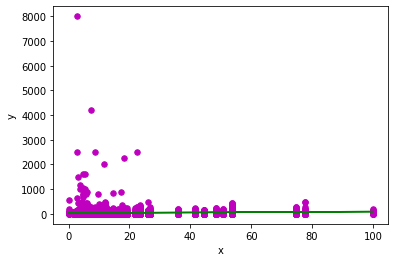

In [31]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_1_rarest']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

In [32]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_1_rarest']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     78.80
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           7.50e-19
Time:                        12:31:26   Log-Likelihood:            -1.0649e+05
No. Observations:               17826   AIC:                         2.130e+05
Df Residuals:                   17824   BIC:                         2.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6500      1.009     34.333      0.0

## Regression for Average Rarity Model

https://blog.csdn.net/seagal890/article/details/105125566


Estimated coefficients:
b_0 = 32.51596514416302  
b_1 = 1.3510136947519262


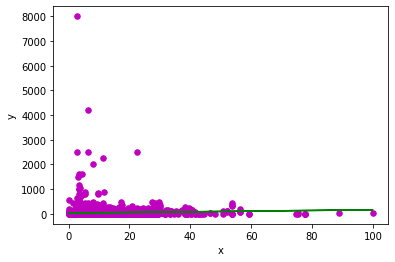

In [33]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_2_Average']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

linear regression: 
https://stackoverflow.com/questions/43608932/python-3-nameerror-name-sklearn-is-not-defined


error term:
https://blog.csdn.net/qq_45669448/article/details/105369454

In [34]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_2_Average']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     92.17
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           8.99e-22
Time:                        12:31:26   Log-Likelihood:            -1.0648e+05
No. Observations:               17826   AIC:                         2.130e+05
Df Residuals:                   17824   BIC:                         2.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5160      1.135     28.658      0.0

## Regression for Statistical Model

Estimated coefficients:
b_0 = 40.82014030739177  
b_1 = 0.0009066819494929438


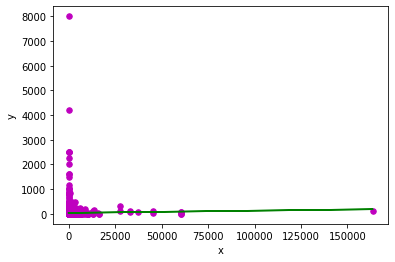

In [35]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_3_multiple']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

In [36]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_3_multiple']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.176
Date:                Thu, 09 Feb 2023   Prob (F-statistic):             0.0229
Time:                        12:31:27   Log-Likelihood:            -1.0653e+05
No. Observations:               17826   AIC:                         2.131e+05
Df Residuals:                   17824   BIC:                         2.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8201      0.718     56.853      0.0

# Hedonic Pricing Model for Rarity, Gas Fee and ETH/USD (Prediction) 

multiple regression: https://blog.csdn.net/HHTNAN/article/details/78843722


## sort the data with timestamp and then split training and testing set

In [37]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
2458,2458,2018-01-18,2794,15,0.15,5289,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,12.040656,9.048897,72.931919,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2459,2459,2018-01-18,809,920,0.09,8994,Human,Female,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,74.786090,26.889225,486.899335,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2462,2462,2018-01-18,1303,2450,0.09,4679,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,7.460154,6.064456,34.829651,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
319,319,2018-01-18,1303,2030,0.25,9863,Human,Male,Dark,1,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,1.478706,1.478706,1.478706,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2473,2473,2018-01-19,1303,5126,0.14,1575,Human,Male,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,7.585070,5.654169,166.565775,1.516320e+09,2018-1-19,0.052589,2018-1-19,979.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,4,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,5.427700,3.061263,0.000000,1.658794e+09,2022-7-26,0.001820,2022-7-26,"1,450.91"
17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,4.715707,4.285346,18.178976,1.658794e+09,2022-7-26,0.001820,2022-7-26,"1,450.91"
17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,3,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,18.331532,8.951758,329.930659,1.658794e+09,2022-7-26,0.001820,2022-7-26,"1,450.91"
13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,4,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,19.315489,7.224599,0.000000,1.658880e+09,2022-7-27,0.001720,2022-7-27,"1,635.98"


In [38]:
df_cryp['eth_usd_price']=df_cryp['eth_usd_price'].apply(lambda x: float(x.replace(',',''))) 

<ipython-input-38-82c80335deca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cryp['eth_usd_price']=df_cryp['eth_usd_price'].apply(lambda x: float(x.replace(',','')))


Time Series data train and test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html


In [39]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [40]:
# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [41]:
for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [   0    1    2 ... 5591 5592 5593] TEST: [ 5594  5595  5596 ... 11184 11185 11186]
TRAIN: [    0     1     2 ... 11184 11185 11186] TEST: [11187 11188 11189 ... 16777 16778 16779]


In [42]:
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)    

In [43]:
train_df.head()
test_df.head()

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
11187,11187,2021-02-17,2055,3848,15.4,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,6.168236,6.088559,37.064201,1.613520e+09,2021-2-17,0.00215,2021-2-17,1847.48
11188,11188,2021-08-27,5756,3096,135.0,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,6.168236,6.088559,37.064201,1.630022e+09,2021-8-27,0.00319,2021-8-27,3273.57
11189,11189,2021-10-07,2642,3302,160.0,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,6.168236,6.088559,37.064201,1.633565e+09,2021-10-7,0.00257,2021-10-7,3586.93
11190,11190,2021-02-17,2292,1727,9.5,8644,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,4.114911,16.849569,1.613520e+09,2021-2-17,0.00215,2021-2-17,1847.48
11191,11191,2021-02-21,1727,5555,15.7,8644,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,4.114911,16.849569,1.613866e+09,2021-2-21,0.00502,2021-2-21,1933.78


## define X_train, X_test, y_train, and y_test

In [44]:
cols_R = ['eth_price','Rarity_Score_1_rarest','Rarity_Score_2_Average','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['eth_price',
 'Rarity_Score_1_rarest',
 'Rarity_Score_2_Average',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [45]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,eth_price,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
11187,15.4,6.168236,6.088559,37.064201,0.00215,1847.48
11188,135.0,6.168236,6.088559,37.064201,0.00319,3273.57
11189,160.0,6.168236,6.088559,37.064201,0.00257,3586.93
11190,9.5,4.402877,4.114911,16.849569,0.00215,1847.48
11191,15.7,4.402877,4.114911,16.849569,0.00502,1933.78


In [46]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Hedonic regression with Rarity Score 1

In [47]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [48]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['eth_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['eth_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(10143, 3)
 y_train.shape =(10143, 1)
 X_test.shape=(5591, 3)
,  y_test.shape=(5591, 1)
LinearRegression()
[-10.885584]
[[ 6.22941051e-01 -2.29712674e+02  2.34084942e-02]]


RMSE by hand: [76.74246529]


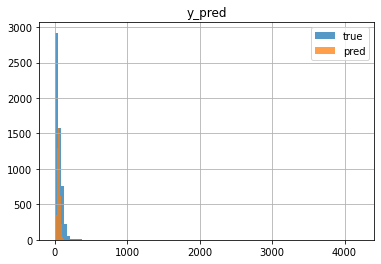

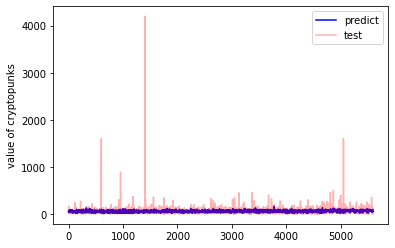

In [49]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [50]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     576.4
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:31:28   Log-Likelihood:                -99866.
No. Observations:               16780   AIC:                         1.997e+05
Df Residuals:                   16776   BIC:                         1.998e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0989      2.038     -3.973      0.0

## Hedonic regression with Rarity Score 2

In [51]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

RMSE by hand: [76.66943026]


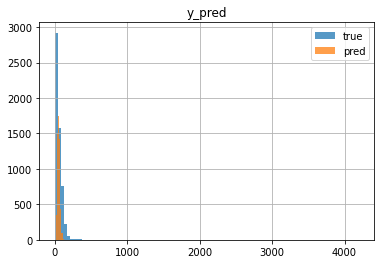

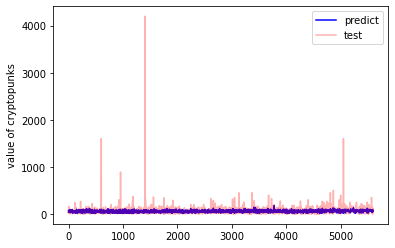

In [52]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [53]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_2_Average','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     588.4
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:31:28   Log-Likelihood:                -99850.
No. Observations:               16780   AIC:                         1.997e+05
Df Residuals:                   16776   BIC:                         1.997e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7354      2.120     -5.536      0.0

## Hedonic regression with Rarity Score 3

In [54]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

RMSE by hand: [77.39496069]


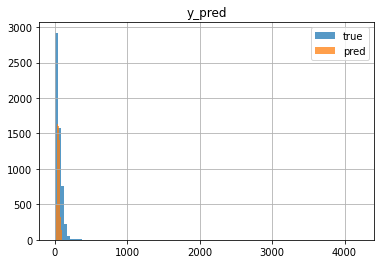

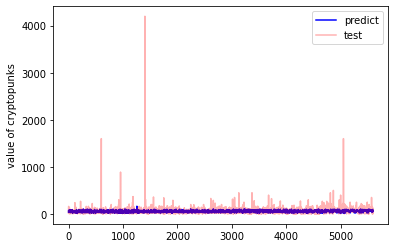

In [55]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [56]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     532.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:31:29   Log-Likelihood:                -99926.
No. Observations:               16780   AIC:                         1.999e+05
Df Residuals:                   16776   BIC:                         1.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1486      1.913     -0.078      0.9

# Random Forest Regression

## Rarity Score 1

In [58]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-60-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: -0.09711010555467436


## Rarity Score 2

In [61]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-62-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: -0.13515940409428118


## Rarity Score 3

In [63]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-64-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: 0.029425683844464867


# Auto-ML

## Import Packages

In [68]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 KB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [69]:
from autogluon.tabular import TabularDataset, TabularPredictor

## Rarity Score 1

In [70]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [71]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10143
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2500.0, 0.0, 30.80763, 62.61632)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11594.53 MB
	Train Data (Original)  Memory Usage: 0.24 MB (0.0% of available memory)
	Inferring data type o

[1000]	valid_set's rmse: 63.7893
[2000]	valid_set's rmse: 63.4994
[3000]	valid_set's rmse: 63.2829
[4000]	valid_set's rmse: 63.1187


	-63.0752	 = Validation score   (-root_mean_squared_error)
	6.0s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: LightGBM ...
	-62.5787	 = Validation score   (-root_mean_squared_error)
	0.67s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-66.4627	 = Validation score   (-root_mean_squared_error)
	6.34s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: CatBoost ...
	-63.3983	 = Validation score   (-root_mean_squared_error)
	8.04s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-67.011	 = Validation score   (-root_mean_squared_error)
	6.46s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-65.6498	 = Validation score   (-root_mean_squared_error)
	20.19s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-63.3482	 = Validation score   (-root_mean_squared_error)
	0.41s	 = Training   runtime
	0.01s	 = Validation runt

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-73.450631,-73.450631,-5394.995195,-18.975094,-8.299113,0.133148,-62.578692,0.121320,0.007352,0.667848,0.121320,0.007352,0.667848,1,True,4
1,NeuralNetTorch,-73.504817,-73.504817,-5402.958187,-19.920015,-9.372052,0.131869,-65.042321,0.070610,0.021066,33.934315,0.070610,0.021066,33.934315,1,True,10
2,WeightedEnsemble_L2,-73.569159,-73.569159,-5412.421168,-18.768090,-8.107697,0.130348,-62.532036,3.356800,0.624381,13.489524,0.004694,0.004137,0.479019,2,True,12
3,LightGBMXT,-73.892876,-73.892876,-5460.157093,-20.761600,-10.239091,0.122678,-63.075229,2.274936,0.392941,6.004931,2.274936,0.392941,6.004931,1,True,3
4,NeuralNetFastAI,-73.946975,-73.946975,-5468.155072,-22.307991,-12.541458,0.121393,-65.649786,0.156243,0.017260,20.193550,0.156243,0.017260,20.193550,1,True,8
5,LightGBMLarge,-75.699571,-75.699571,-5730.425074,-19.705661,-7.591642,0.079252,-64.587016,0.072247,0.024755,1.150631,0.072247,0.024755,1.150631,1,True,11
6,CatBoost,-76.148637,-76.148637,-5798.614962,-19.131365,-9.037071,0.068296,-63.398275,0.027725,0.028871,8.039602,0.027725,0.028871,8.039602,1,True,6
7,KNeighborsUnif,-81.142241,-81.142241,-6584.063238,-23.690142,-9.056001,-0.057908,-66.944905,0.030517,0.010775,1.267066,0.030517,0.010775,1.267066,1,True,1
8,XGBoost,-81.432114,-81.432114,-6631.189221,-18.896628,-8.173985,-0.065480,-63.348246,0.069410,0.005931,0.406049,0.069410,0.005931,0.406049,1,True,9
9,RandomForestMSE,-83.481078,-83.481078,-6969.090409,-20.216548,-6.975992,-0.119773,-66.462703,0.955849,0.219952,6.337727,0.955849,0.219952,6.337727,1,True,5


## Rarity Score 2

In [72]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [73]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10143
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2500.0, 0.0, 30.80763, 62.61632)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11573.58 MB
	Train Data (Original)  Memory Usage: 0.24 MB (0.0% of available memory)
	Inferring data type o

[1000]	valid_set's rmse: 64.7367


	-64.7211	 = Validation score   (-root_mean_squared_error)
	1.82s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ...
	-65.3082	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-67.9406	 = Validation score   (-root_mean_squared_error)
	7.51s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: CatBoost ...
	-64.9931	 = Validation score   (-root_mean_squared_error)
	4.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-67.0997	 = Validation score   (-root_mean_squared_error)
	4.43s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-65.5783	 = Validation score   (-root_mean_squared_error)
	23.69s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-66.1165	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.0s	 = Validation runt

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-73.101743,-73.101743,-5343.864856,-20.210300,-10.612335,0.141363,-64.573338,0.363250,0.135068,35.952775,0.003713,0.000561,0.281967,2,True,12
1,CatBoost,-73.355131,-73.355131,-5380.975191,-19.720520,-10.104091,0.135401,-64.993133,0.023870,0.010975,4.308840,0.023870,0.010975,4.308840,1,True,6
2,LightGBMXT,-73.452446,-73.452446,-5395.261811,-21.177358,-11.517737,0.133105,-64.721080,0.292688,0.091274,1.815042,0.292688,0.091274,1.815042,1,True,3
3,LightGBM,-73.608836,-73.608836,-5418.260755,-19.470032,-9.022696,0.129410,-65.308217,0.013858,0.004860,0.546667,0.013858,0.004860,0.546667,1,True,4
4,NeuralNetTorch,-73.633860,-73.633860,-5421.945403,-21.062464,-10.325658,0.128818,-64.955364,0.042270,0.018587,33.821535,0.042270,0.018587,33.821535,1,True,10
5,NeuralNetFastAI,-73.834246,-73.834246,-5451.495912,-21.970216,-11.855230,0.124070,-65.578304,0.089408,0.016570,23.688709,0.089408,0.016570,23.688709,1,True,8
6,LightGBMLarge,-75.131679,-75.131679,-5644.769163,-19.925787,-7.846054,0.093015,-66.397882,0.040684,0.027081,1.136557,0.040684,0.027081,1.136557,1,True,11
7,XGBoost,-77.627257,-77.627257,-6025.991023,-19.500467,-8.815298,0.031761,-66.116520,0.029667,0.004473,0.375130,0.029667,0.004473,0.375130,1,True,9
8,KNeighborsUnif,-80.260093,-80.260093,-6441.682587,-22.666432,-8.736000,-0.035031,-67.789051,0.011822,0.010074,0.019106,0.011822,0.010074,0.019106,1,True,1
9,ExtraTreesMSE,-81.978297,-81.978297,-6720.441166,-20.977519,-7.948050,-0.079821,-67.099726,0.362061,0.209482,4.425879,0.362061,0.209482,4.425879,1,True,7


## Rarity Score 3

In [74]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [75]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10143
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2500.0, 0.0, 30.80763, 62.61632)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11611.73 MB
	Train Data (Original)  Memory Usage: 0.24 MB (0.0% of available memory)
	Inferring data type o

[1000]	valid_set's rmse: 65.6378


	-65.5577	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
	-65.5354	 = Validation score   (-root_mean_squared_error)
	0.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-66.4161	 = Validation score   (-root_mean_squared_error)
	3.07s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-65.3938	 = Validation score   (-root_mean_squared_error)
	1.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-72.877	 = Validation score   (-root_mean_squared_error)
	1.36s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-66.3	 = Validation score   (-root_mean_squared_error)
	13.16s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-65.0764	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.01s	 = Validation runtime


,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-73.959978,-73.959978,-5470.078334,-20.467278,-9.941490,0.121084,-65.535436,0.012408,0.003300,0.406204,0.012408,0.003300,0.406204,1,True,4
1,LightGBMXT,-74.183156,-74.183156,-5503.140638,-22.317937,-12.908336,0.115772,-65.557689,0.205242,0.037955,0.830088,0.205242,0.037955,0.830088,1,True,3
2,NeuralNetTorch,-74.251120,-74.251120,-5513.228817,-21.395158,-10.440498,0.114151,-65.738262,0.037594,0.011907,56.894754,0.037594,0.011907,56.894754,1,True,10
3,NeuralNetFastAI,-74.548531,-74.548531,-5557.483409,-23.069044,-13.039143,0.107040,-66.300031,0.088288,0.015800,13.162316,0.088288,0.015800,13.162316,1,True,8
4,CatBoost,-74.909384,-74.909384,-5611.415885,-20.555077,-9.994349,0.098374,-65.393797,0.006849,0.002661,1.723937,0.006849,0.002661,1.723937,1,True,6
5,WeightedEnsemble_L2,-75.079453,-75.079453,-5636.924267,-19.855163,-9.401299,0.094276,-64.898723,0.378620,0.140052,60.673254,0.011695,0.000441,0.287477,2,True,12
6,LightGBMLarge,-75.843565,-75.843565,-5752.246297,-21.621753,-9.450813,0.075746,-67.245662,0.020574,0.003936,0.711839,0.020574,0.003936,0.711839,1,True,11
7,RandomForestMSE,-76.058349,-76.058349,-5784.872516,-21.241754,-9.093960,0.070504,-66.416134,0.311120,0.122200,3.071713,0.311120,0.122200,3.071713,1,True,5
8,ExtraTreesMSE,-78.565465,-78.565465,-6172.532276,-21.575465,-8.505264,0.008216,-72.876975,0.247027,0.194972,1.362945,0.247027,0.194972,1.362945,1,True,7
9,XGBoost,-78.704632,-78.704632,-6194.419127,-20.658363,-9.580118,0.004699,-65.076354,0.018211,0.005503,0.419311,0.018211,0.005503,0.419311,1,True,9
